In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

penguins = load_penguins().dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
# Specifying X, Y, and split
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), ["island", "sex"]), # Dummifying Cat. Variables
  ("standardize",
  StandardScaler(), ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]) #standardizing numerical variables
  ], remainder = "passthrough"
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
# First kNN
# Create pipeline
knn1 = Pipeline(
  [("preprocessing", ct),
   ("knn_classifier", KNeighborsClassifier(n_neighbors=1))]
).set_output(transform = "pandas")

# Fitting Pipeline
knn1.fit(X_train, y_train)

# Predict using the kNN (k=1) model
y_preds1 = knn1.predict(X_test)

# Finding Precision, Recall, F-1 Score for Each Species
from sklearn.metrics import classification_report

# Classification Report and Outputting as DF
scores_knn1 = classification_report(y_test, y_preds1, output_dict=True)
scores_knn1 = pd.DataFrame(scores)
scores_knn1

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,36.0,15.0,33.0,1.0,84.0,84.0


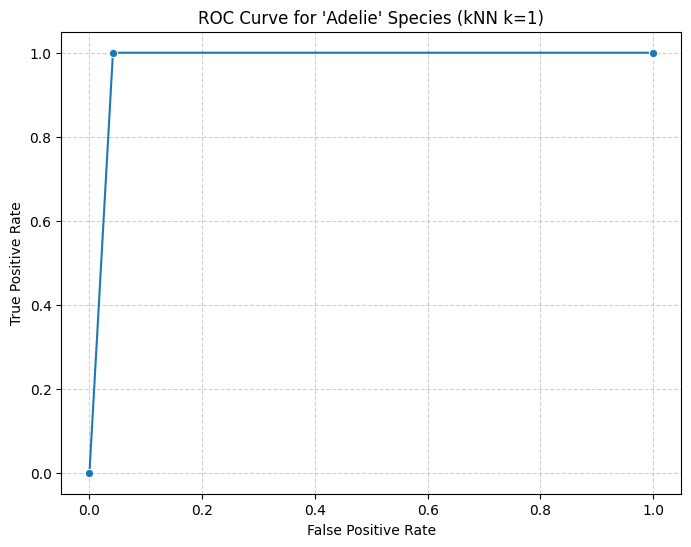

In [ ]:
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
# Predict probabilities for ROC curve calculation
y_proba_knn1 = knn1.predict_proba(X_test)

# Generate ROC curve for 'Adelie'
fpr, tpr, _ = roc_curve((y_test == "Adelie").astype(int), y_proba_knn1[:, 0])

# Prepare data for plotting
roc_data = pd.DataFrame({"FPR": fpr, "TPR": tpr})

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_data, x="FPR", y="TPR", marker='o')
plt.title("ROC Curve for 'Adelie' Species (kNN k=1)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# Second kNN
# Create pipeline
knn2 = Pipeline(
  [("preprocessing", ct),
   ("knn_classifier", KNeighborsClassifier(n_neighbors=5))]
).set_output(transform = "pandas")

# Fitting Pipeline
knn2.fit(X_train, y_train)

# Predict using the kNN (k=1) model
y_preds2 = knn2.predict(X_test)


# Classification Report and Outputting as DF
scores_knn2 = classification_report(y_test, y_preds2, output_dict=True)
scores_knn2 = pd.DataFrame(scores)
scores_knn2

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,36.0,15.0,33.0,1.0,84.0,84.0


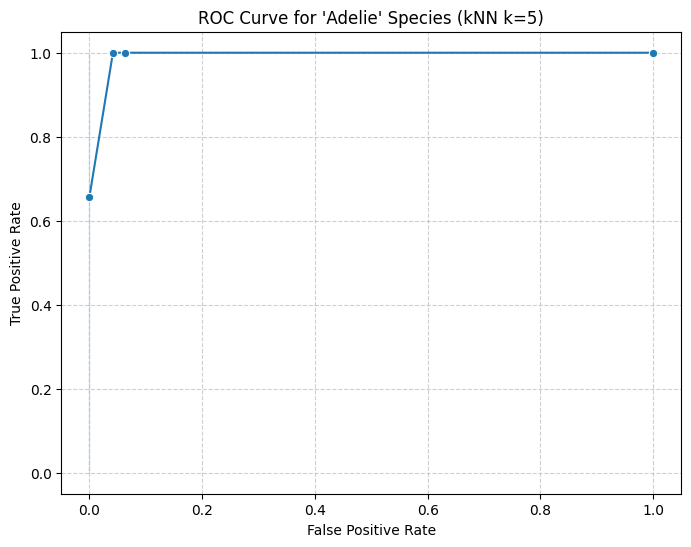

In [ ]:
# Predict probabilities for ROC curve calculation
y_proba_knn2 = knn2.predict_proba(X_test)

# Generate ROC curve for 'Adelie'
fpr, tpr, _ = roc_curve((y_test == "Adelie").astype(int), y_proba_knn2[:, 0])

# Prepare data for plotting
roc_data = pd.DataFrame({"FPR": fpr, "TPR": tpr})

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_data, x="FPR", y="TPR", marker='o')
plt.title("ROC Curve for 'Adelie' Species (kNN k=5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# First decision tree
# Decision tree pipeline
dt1 = Pipeline(
    [("preprocessing", ct),
     ("dt_classifier", DecisionTreeClassifier(max_depth=3, random_state=42))]
).set_output(transform="pandas")

# Fit and predict
dt1.fit(X_train, y_train)
y_preds_dt1 = dt1.predict(X_test)

# Classification report for Decision Tree 1
scores_dt1 = classification_report(y_test, y_preds_dt1, output_dict=True)
scores_dt1 = pd.DataFrame(scores_dt1)
scores_dt1

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.944444,0.928571,0.970588,0.952381,0.947868,0.951881
recall,0.944444,0.866667,1.000000,0.952381,0.937037,0.952381
f1-score,0.944444,0.896552,0.985075,0.952381,0.942024,0.951854
support,36.000000,15.000000,33.000000,0.952381,84.000000,84.000000


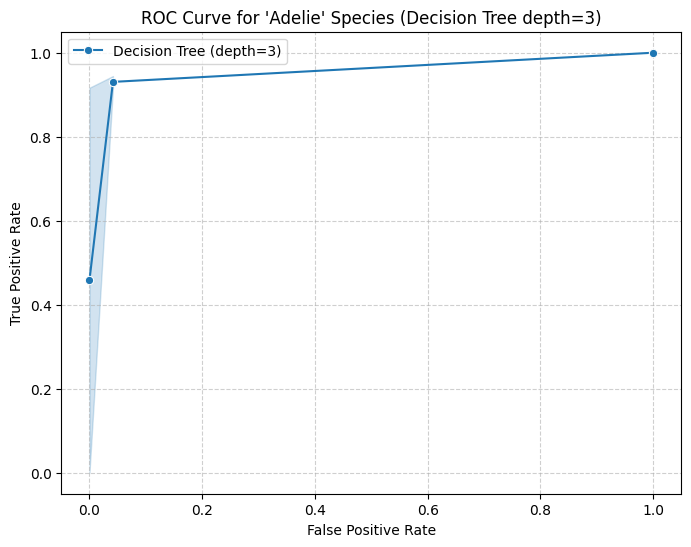

In [ ]:
# Predict probabilities for ROC curve calculation
y_proba_dt1 = dt1.predict_proba(X_test)

# Generate ROC curve for 'Adelie'
fpr1, tpr1, _ = roc_curve((y_test == "Adelie").astype(int), y_proba_dt1[:, 0])

# Plot the ROC curve for Decision Tree (max_depth=3)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr1, y=tpr1, marker='o', label="Decision Tree (depth=3)")
plt.title("ROC Curve for 'Adelie' Species (Decision Tree depth=3)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# Second decision tree
# Decision tree pipeline
dt2 = Pipeline(
    [("preprocessing", ct),
     ("dt_classifier", DecisionTreeClassifier(max_depth=10, random_state=42))]
).set_output(transform="pandas")

# Fit and predict
dt2.fit(X_train, y_train)
y_preds_dt2 = dt2.predict(X_test)

# Classification report for Decision Tree 2
scores_dt2 = classification_report(y_test, y_preds_dt2, output_dict=True)
scores_dt2 = pd.DataFrame(scores_dt2)
scores_dt2

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.000000,0.937500,0.970588,0.97619,0.969363,0.977285
recall,0.944444,1.000000,1.000000,0.97619,0.981481,0.976190
f1-score,0.971429,0.967742,0.985075,0.97619,0.974748,0.976131
support,36.000000,15.000000,33.000000,0.97619,84.000000,84.000000


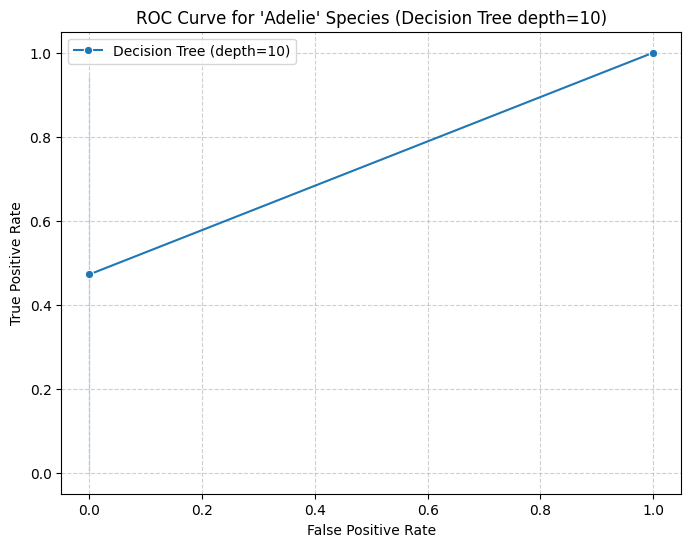

In [ ]:
# Predict probabilities for ROC curve calculation
y_proba_dt2 = dt2.predict_proba(X_test)

# Generate ROC curve for 'Adelie'
fpr2, tpr2, _ = roc_curve((y_test == "Adelie").astype(int), y_proba_dt2[:, 0])

# Plot the ROC curve for Decision Tree (max_depth=3)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr2, y=tpr2, marker='o', label="Decision Tree (depth=10)")
plt.title("ROC Curve for 'Adelie' Species (Decision Tree depth=10)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()